In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
import numpy as np
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import tensorflow as tf
import PIL.Image
import keras.backend as K
from matplotlib import pylab as plt
%matplotlib inline

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Predicted: [('n02510455', 'giant_panda', 0.99992204)] 388


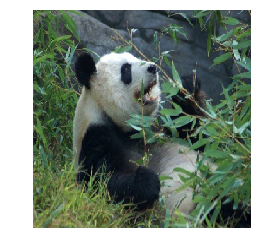

In [8]:
# Load and compile the model
from Utils import load_image,show_image
model = VGG16(weights='imagenet')
model.compile(loss='mean_squared_error', optimizer='adam')

# Load an image and make the prediction
img_path = './happy_animal.jpg'
img = load_image(img_path)
show_image(img, grayscale=False)

x = np.expand_dims(img, axis=0)

preds = model.predict(x)
label = np.argmax(preds)
print ('Predicted:', decode_predictions(preds, top=1)[0], label)

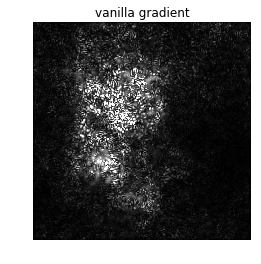

In [11]:
from Mask import GradientSaliencyMask
vanilla = GradientSaliencyMask(model,388)
mask = vanilla.get_mask(img)
show_image(mask, title='vanilla gradient',grayscale=True)

#mask = vanilla.get_smoothed_mask(img)
#show_image(mask, ax=plt.subplot('122'), title='smoothed vanilla gradient')

In [10]:
from PIL import Image
img = Image.open(img_path)
img.load()
img = img.resize((224,224))